# Accessing Bulk Wikipedia Text Data

Medium Link: 

## Abstract

Wikipedia is one of the largest repositories of human knowledge and offers a huge store of information to mine and use for everything from research to model development. While there are many ways to access the data, one of the most interesting is through accessing the dump files provided by wikipedia which can give access to huge amounts of data quickly. In this example I am  processing the full English language wikipedia dump. 

##

## Libaries

Below are the three libarries we will be using for this tutotrial. 
* mwxml is for steaming the xml dump 
* wikitextparser for cleaning article text 
* pprint so we can actually see what we are doing.

In [4]:
import mwxml
import wikitextparser as wtp
from pprint import pprint

## Data Source

First, where do we find the information? The Wikimedia Foundation offers data dumps as a utility more than an outward product. Therefore, finding where to actually download the separate dumps can be a little confusing.

That being said, the latest dumps can be found at https://dumps.wikimedia.org/enwiki/.

First, follow the dated link that you are interested in. Then, you will be taken to the download page. Large dump downloads are rate limited, so they can take a while. There are options to download the data through a torrent, but that is outside the scope of this project.

## Data Processing

The raw xml dump from Wikipedia is dense, confusing, and hard to navigate. Below is an example of the raw file. Which is complex and incomprehensible at the best of times. Thankfully, there are several libraries we can use to easily access the information we want.

First, we need to process the data from its raw streaming xml format to a more usable format. Then, we process the Wikipedia markdown to usable text chunks. I will be demonstrating how to process the uncompressed dumps into usable text in the next sections.

# Streaming XML Wikipedia Dump

Using the MediaWiki XML (pip name: mwxml) seems to make page information processing easier. First, you need to make the Dump object by pointing at the xml file with the following code snip it.


In [28]:
dump = mwxml.Dump.from_file(open(r"your/file/path.xml", encoding="utf8"))
# make sure we read in the data correctly
print(dump.site_info.name, dump.site_info.dbname)

Wikipedia enwiki


Once we have the dump object, we can iterate through the files using the following syntax. I have limited this script to only the first article for illustrative purposes.

In [31]:
for index, page in enumerate(dump.pages):
    print(f"ID: {page.id}, Redirect:{ page.redirect}, Title: {page.title}")
    if index == 1:
        break

ID: 29, Redirect:Demographics of Albania, Title: AlbaniaPeople
ID: 30, Redirect:As We May Think, Title: AsWeMayThink


Okay this is great! But I am not super interested in meta data about pages, instead we want to access 10s of gigabytes of text data! We can do that through the revision object of a page as seen in the below script which will display the content of the article. Our dumps only tend to include one revision of a page but if you are interested in the history of an article there are other dumps available.

I am also including some filters to prevent showing redirect articles (articles direct traffic to other articles) and articles in the mainline Wikipedia entries.

In [24]:
for index, page in enumerate(dump.pages):
    # print(f"ID: {page.id}, Redirect:{ page.redirect}, Title: {page.title}")
    if (page.redirect == None) & (page.namespace == 0):
        for index2, revision in enumerate(page):
            print(revision.text)
          
            if index2 == 1:
                break
    if index == 1:
                break


{{Short description|First letter of the Latin alphabet}}
{{About|the Latin letter|the similar Greek letter|Alpha|the similar Cyrillic letter|A (Cyrillic)|other uses}}
{{Technical reasons|A#|A-sharp|A-sharp (disambiguation){{!}}A-sharp}}
{{pp-protected|small=yes}}
{{bots|deny=Citation bot}}{{CS1 config|mode=}}
{{Use dmy dates|date=November 2019}}
{{Infobox grapheme
|letter = A a
|script = [[Latin script]]
|type = [[Alphabet]]
|typedesc = ic
|language = [[Latin language]]
|phonemes={{grid list|width=2em|[{{IPAlink|a}}]|[{{IPAlink|ɑ}}]|[{{IPAlink|ɒ}}]|[{{IPAlink|æ}}]|[{{IPAlink|ə}}]|[{{IPAlink|ɛ}}]|[{{IPAlink|oː}}]|[{{IPAlink|ɔ}}]|[{{IPAlink|e}}]|[{{IPAlink|ʕ}}]|[{{IPAlink|ʌ}}] [{{IPAlink|ɐ}}] |{{IPAc-en|eɪ}}}}
|unicode=U+0041, U+0061
|alphanumber = 1
|fam1=<hiero>F1</hiero>
|fam2=[[File:Proto-semiticA-01.svg|20px|Proto-Sinaitic 'alp]]
|fam3=[[File:Protoalef.svg|20px|Proto-Caananite aleph]]
|fam4=[[File:Phoenician_aleph.svg|20px|Phoenician aleph]]
|fam5=[[Alpha|Α α]]
|fam6=[[𐌀]][[File:Gre

## Cleaning an Article

Now The above article (as you may have seen) is incredibly busy. It's also formatted in a version of markdown specific to Wikimedia– so not super helpful for us if we want to be processing this data in anything resembling human readable text. To help, there is a library that can clean and break down this data into plain text and separate out sections of an article.
WikiTextParser (pip name: wikitextparser) is a wonderful library that gives us a ton of utilities for pulling apart a formatted wikipedia article. Here we will be pushing an article from our dump, through WikiTextParser, and then the plain text of the article section.

In [34]:
for index, page in enumerate(dump.pages):
    #print(f"ID: {page.id}, Redirect:{ page.redirect}, Title: {page.title}")
    if (page.redirect == None) & (page.namespace == 0):
        for index2, revision in enumerate(page):
            parsed = wtp.parse(revision.text)
            for section in range(len(parsed.sections)):
                pprint(parsed.sections[section].plain_text())
            if index2 == 1:
                break
    if index == 10:
                break

('\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 'Anarchism is a political philosophy and movement that is against all forms '
 'of authority and seeks to abolish the institutions it claims maintain '
 'unnecessary coercion and hierarchy, typically including the state and '
 'capitalism. Anarchism advocates for the replacement of the state with '
 'stateless societies and voluntary free associations. A historically '
 'left-wing movement, anarchism is usually described as the libertarian wing '
 'of the socialist movement (libertarian socialism).\n'
 '\n'
 'Although traces of anarchist ideas are found all throughout history, modern '
 'anarchism emerged from the Enlightenment. During the latter half of the 19th '
 'and the first decades of the 20th century, the anarchist movement flourished '
 "in most parts of the world and had a significant role in workers' struggles "
 'for emancipation. Various anarchist schools of thought formed during this '
 'period. Anarchists have taken 

## Conclusion

From here, the world (well, Wikipedia) is your oyster. You can explore natural language processing, text cleaning, model traning, or even build projects on top of this data. Here is a github link to my ongoing project to create a RAG using Wikipedia data. https://github.com/evanfrank/Wikipedia_Rag

In [3]:
import seaborn as sns

In [7]:
dump = mwxml.Dump.from_file(open(r"Wikipidea-Rag\wikipidea_rag\data\enwiki-20241101-pages-articles-multistream.xml\enwiki-20241101-pages-articles-multistream.xml", encoding="utf8"))


In [8]:
titles = []

for index, page in enumerate(dump.pages):
    # print(f"ID: {page.id}, Redirect:{ page.redirect}, Title: {page.title}")
    if (page.redirect == None) & (page.namespace == 0):
        titles.append(page.title)

    if index == 1000:
                break


In [11]:
import pandas as pd
df = pd.DataFrame({"title": titles})

In [29]:
from collections import Counter
import re

def letter_frequency(df, column_name):
    text = ''.join(df[column_name].astype(str))
    text = text.lower()
    text = re.sub(r'[^a-z]', '', text)
    letter_counts = Counter(text)
    return pd.DataFrame({"Letter Count": letter_counts})

In [33]:
letter_freq_series = letter_frequency(df, 'title')
letter_freq_series=letter_freq_series.reset_index(names="Letter")

In [35]:
letter_freq_series

,Letter,Letter Count
0,a,1499
1,n,646
2,r,624
3,c,298
4,h,185
5,i,744
6,s,550
7,m,319
8,l,524
9,b,185


C:\Users\evanf\AppData\Local\Temp\ipykernel_1628\995155296.py:1: UserWarning: 
The palette list has fewer values (10) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y="Letter",


<Axes: xlabel='Letter Count', ylabel='Letter'>

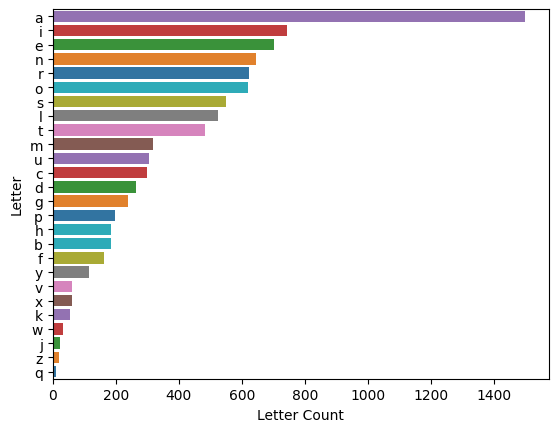

In [ ]:
sns.barplot(y="Letter",
            x="Letter Count",
            data=letter_freq_series.sort_values("Letter Count",ascending=False),
            hue="Letter Count",
            palette=sns.color_palette(),
            legend=False,
            )

In [2]:
%pip install seaborn

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------------- ------------- 5.2/8.1 MB 26.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 27.8 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 30.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 38.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
